In [1]:
import wandb
import matplotlib.pyplot as plt

# Initialize a wandb API client
api = wandb.Api(api_key="471331f912e2b2e7a3d6007c7cce37cccd3dca4c")



In [3]:
def map_names(proj_name):
    name_dict = {
        "mbert": "mBERT",
        "xlmroberta": "XLM-RoBERTa",
        "biobert": "Bio-BERT",
    }
    model = proj_name.split('_')[1]
    return name_dict[model]

def map_names_multi(proj_name):
    name_dict = {
        "mbert": "mBERT-Multi",
        "xlmroberta": "XLM-RoBERTa-Multi",
        "biobert": "Bio-BERT-Multi",
    }
    model = proj_name.split('_')[1]
    return name_dict[model]


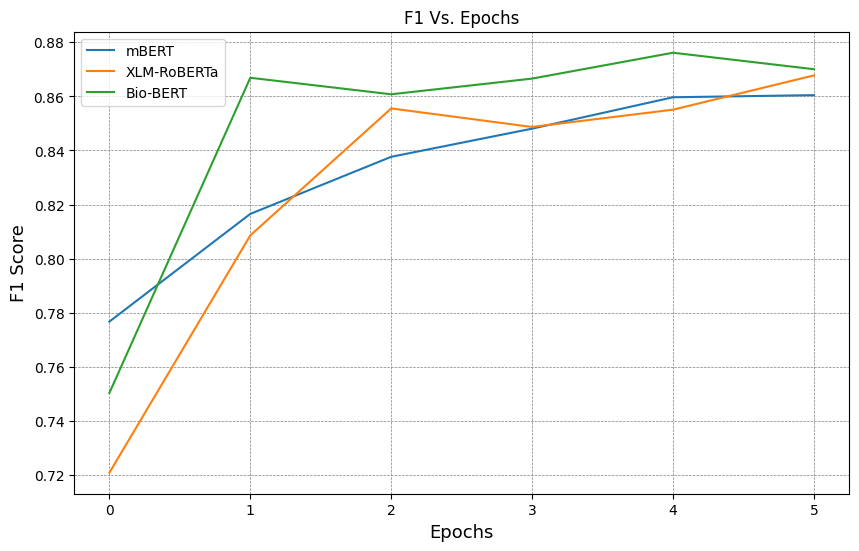

In [12]:
lang = "eu"
# define your project and entity (user or team name)
projects = [f"ner_mbert_{lang}_final", f"ner_xlmroberta_{lang}_final", f"ner_biobert_{lang}_final"]
entity = "goutham_city"

metric_data = {}

for project in projects:
    runs = api.runs(f"{entity}/{project}")

    for run in runs:
        if run.name != 'to_plot':
            continue
        history = run.scan_history(keys=["f1_score"])  # Replace 'metric_name' with your specific metric
        metric_data[map_names(project)] = [point['f1_score'] for point in history]

# Plotting
plt.figure(figsize=(10, 6))
for run_name, values in metric_data.items():
    plt.plot(values, label=run_name)

plt.title("F1 Vs. Epochs")
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("F1 Score", fontsize=13)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.legend()
plt.savefig(f"plots/{lang}_validation_ner_mono.pdf", format='pdf', bbox_inches='tight')
plt.show()


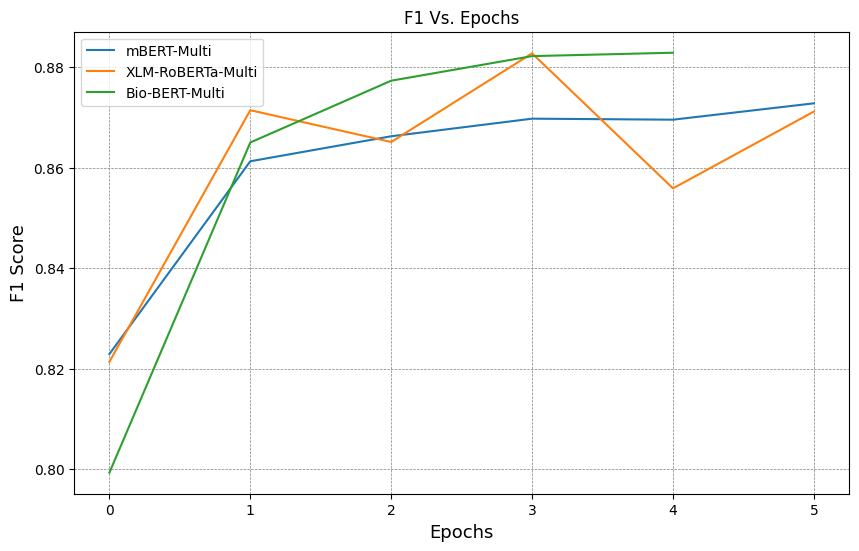

In [15]:
# define your project and entity (user or team name)
projects = [f"ner_mbert_multilingual_final", f"ner_xlmroberta_multilingual_final", f"ner_biobert_multilingual_final"]
entity = "goutham_city"

metric_data = {}

for project in projects:
    runs = api.runs(f"{entity}/{project}")

    for run in runs:
        if run.name != 'to_plot':
            continue
        history = run.scan_history(keys=["f1_score"])  # Replace 'metric_name' with your specific metric
        metric_data[map_names_multi(project)] = [point['f1_score'] for point in history]

# Plotting
plt.figure(figsize=(10, 6))
for run_name, values in metric_data.items():
    plt.plot(values, label=run_name)

plt.title("F1 Vs. Epochs")
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("F1 Score", fontsize=13)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.legend()
plt.savefig(f"plots/validation_ner_multilingual.pdf", format='pdf', bbox_inches='tight')
plt.show()

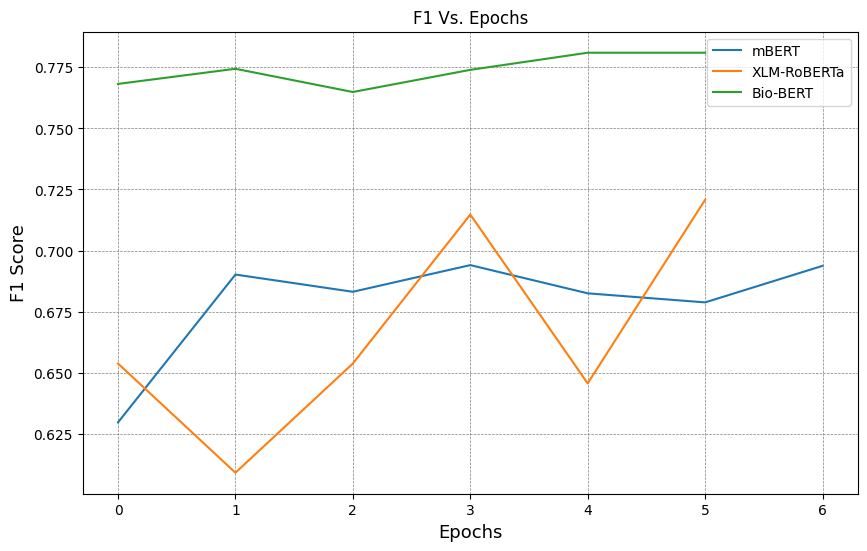

In [20]:
lang = "eu"
# define your project and entity (user or team name)
projects = [f"rc_mbert_{lang}_final", f"rc_xlmroberta_{lang}_final", f"rc_biobert_{lang}_final"]
entity = "goutham_city"

metric_data = {}

for project in projects:
    runs = api.runs(f"{entity}/{project}")

    for run in runs:
        if run.name != 'to_plot':
            continue
        history = run.scan_history(keys=["F-score"])  # Replace 'metric_name' with your specific metric
        metric_data[map_names(project)] = [point['F-score'] for point in history]

# Plotting
plt.figure(figsize=(10, 6))
for run_name, values in metric_data.items():
    plt.plot(values, label=run_name)

plt.title("F1 Vs. Epochs")
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("F1 Score", fontsize=13)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.legend()
plt.savefig(f"plots/{lang}_validation_re_mono.pdf", format='pdf', bbox_inches='tight')
plt.show()

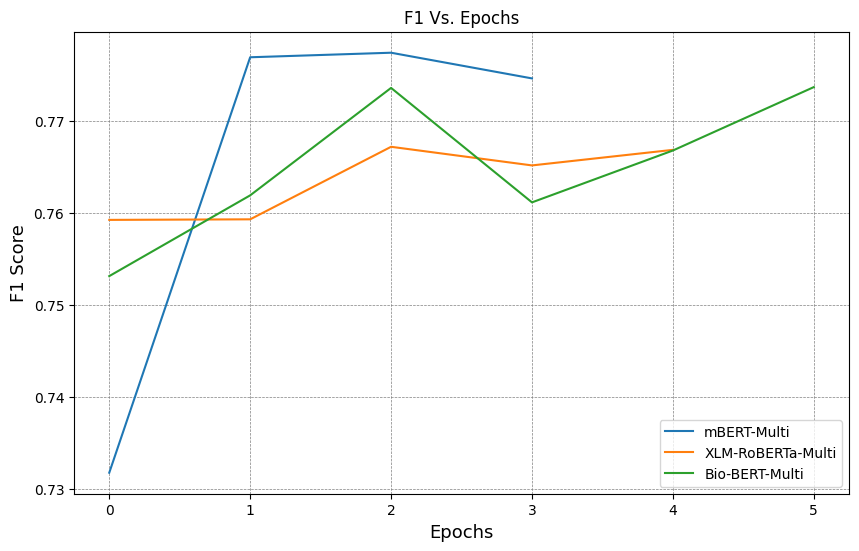

In [4]:
# define your project and entity (user or team name)
projects = [f"rc_mbert_multilingual_final", f"rc_xlmroberta_multilingual_final", f"rc_biobert_multilingual_final"]
entity = "goutham_city"

metric_data = {}

for project in projects:
    runs = api.runs(f"{entity}/{project}")

    for run in runs:
        if run.name != 'to_plot':
            continue
        history = run.scan_history(keys=["F-score"])  # Replace 'metric_name' with your specific metric
        metric_data[map_names_multi(project)] = [point['F-score'] for point in history]

# Plotting
plt.figure(figsize=(10, 6))
for run_name, values in metric_data.items():
    plt.plot(values, label=run_name)

plt.title("F1 Vs. Epochs")
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("F1 Score", fontsize=13)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.legend()
plt.savefig(f"plots/validation_rc_multilingual.pdf", format='pdf', bbox_inches='tight')
plt.show()